<a href="https://colab.research.google.com/github/AmiraAmr99/Numerical_Optimization/blob/main/4_Adagrad_RMSProp_Adam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import random 
random.seed(123)
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [ ]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [ ]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Plot X vs. y

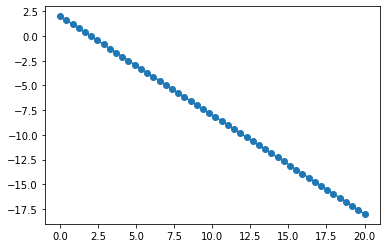

In [ ]:
plt.plot(X,y,'o-')

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

In [ ]:
import math

In [ ]:
def adaGR(X,y,alpha,Eps,max_iter):

    m = len(X)
    theta_0=0
    theta_1=0
    v0=0
    v1=0
    theta_0_list = []
    theta_1_list = []
    loss = []

    for i in range(max_iter):
        theta_0_list.append(theta_0)
        theta_1_list.append(theta_1)
        
        h_x = theta_0 + theta_1*X
        e = (h_x - y)
        J= (1/(2*m))*e@e
        loss.append(J)

        grad_theta_0 = (e.sum())/m
        grad_theta_1 = (X@e)/m

        grad_vec = np.array([grad_theta_0,grad_theta_1])
        grad_vec_norm = np.linalg.norm(grad_vec)

        if (i > 0) and (abs(loss[-1] - loss[-2]) < 0.001 or grad_vec_norm < 0.001):            
            break
        
        v0 = (v0) + (grad_theta_0)**2
        v1 = (v1) + (grad_theta_1)**2
        theta_0 = theta_0 - (alpha/(math.sqrt(v0)+Eps)) *grad_theta_0
        theta_1 = theta_1 - (alpha/(math.sqrt(v1)+Eps)) *grad_theta_1

    print("********************* Training Report *************************\n")
    print(f'Gradient Descent converged after {i+1} iterations\n')
    print('cost=',J,'\n')
    print('Gradient Vector',grad_vec,'\n')
    print('Gradient Vector Norm:',grad_vec_norm,'\n')
    print(f'optimal theta_0: {theta_0}\noptimal theta_1: {theta_1}')
    return theta_0, theta_1, theta_0_list, theta_1_list, loss


##### The following results uses alpha = 0.05, epsilon =  1e-08, and max. iterations = 500.

In [ ]:
theta_0, theta_1, theta_0_list, theta_1_list, loss = adaGR(X,y,alpha=0.05,Eps=1e-08,max_iter=500)

********************* Training Report *************************

Gradient Descent converged after 266 iterations

cost= 0.8939950879138308 

Gradient Vector [-0.47229259  2.64548541] 

Gradient Vector Norm: 2.6873134094593722 

optimal theta_0: -0.5961288035852514
optimal theta_1: -0.7876163789447849


In [ ]:
# plots function

def plots(loss,theta_0_list,theta_1_list,theta_0, theta_1,X,y,index):
    from sklearn.metrics import r2_score
    y_pred = theta_0 + theta_1*X
    print('r2_score = ',r2_score(y,y_pred))
    fig, ax = plt.subplots(4,1,figsize=(8,25))

    #loss vs. Epochs
    ax[0].set_title('loss vs. Epochs')
    ax[0].plot(loss[:index],"o-",markersize=5)
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')


    #loss vs. Theta_0
    ax[1].set_title('loss vs. Theta_0')
    ax[1].plot(theta_0_list[:index],loss[:index],"o-",markersize=5)
    ax[1].set_xlabel('Theta_0')
    ax[1].set_ylabel('Loss')

    #loss vs. Theta_1
    ax[2].set_title('loss vs. Theta_1')
    ax[2].plot(theta_1_list[:index],loss[:index],"o-",markersize=5)
    ax[2].set_xlabel('Theta_1')
    ax[2].set_ylabel('Loss')


    for i in range(len(theta_0_list)):
        y_pred = theta_0_list[i] + theta_1_list[i]*X
        ax[3].plot(X,y_pred,'r')

    ax[3].plot(X,y,'o')
    ax[3].set_xlabel('X')
    ax[3].set_ylabel('Y')

    plt.show()

r2_score =  0.9484638125790851


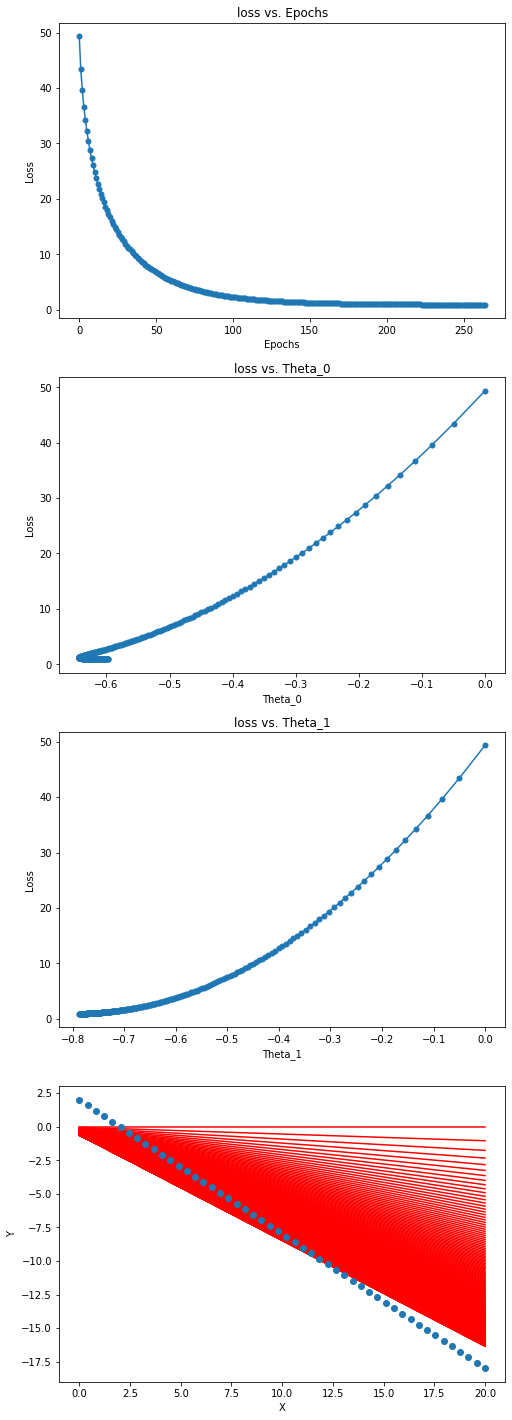

In [ ]:
plots(loss,theta_0_list,theta_1_list,theta_0, theta_1,X,y,-1)

##### The following results uses alpha = 0.005, epsilon =  1e-08, and max. iterations = 5000.

In [ ]:
theta_0, theta_1, theta_0_list, theta_1_list, loss = adaGR(X,y,alpha=0.005,Eps=1e-08,max_iter=5000)

********************* Training Report *************************

Gradient Descent converged after 5000 iterations

cost= 5.037594509367351 

Gradient Vector [ 1.84499325 33.66339401] 

Gradient Vector Norm: 33.7139154734576 

optimal theta_0: -0.5400968829191175
optimal theta_1: -0.5615340004045978


r2_score =  0.7096780137749918


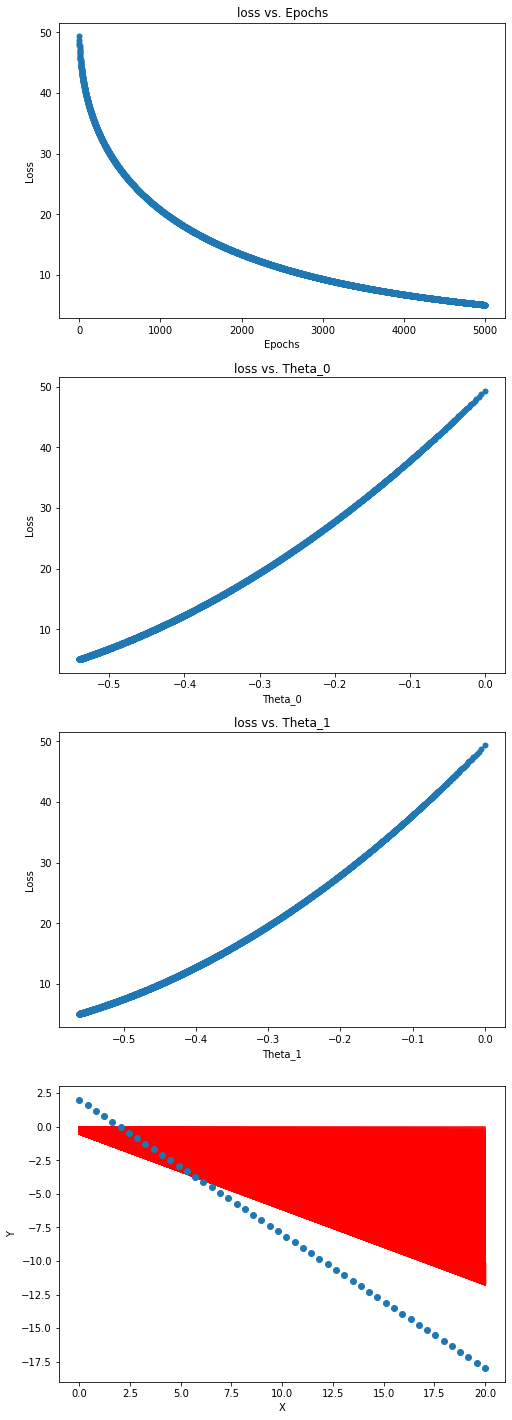

In [ ]:
plots(loss,theta_0_list,theta_1_list,theta_0, theta_1,X,y,-1)

##### The following results uses alpha = 0.0005, epsilon =  1e-08, and max. iterations = 5000.

********************* Training Report *************************

Gradient Descent converged after 3107 iterations

cost= 42.91015419990101 

Gradient Vector [  7.40232905 106.83192431] 

Gradient Vector Norm: 107.08806902367802 

optimal theta_0: -0.05427715912241716
optimal theta_1: -0.054339378913341445
r2_score =  -1.4736441832884104


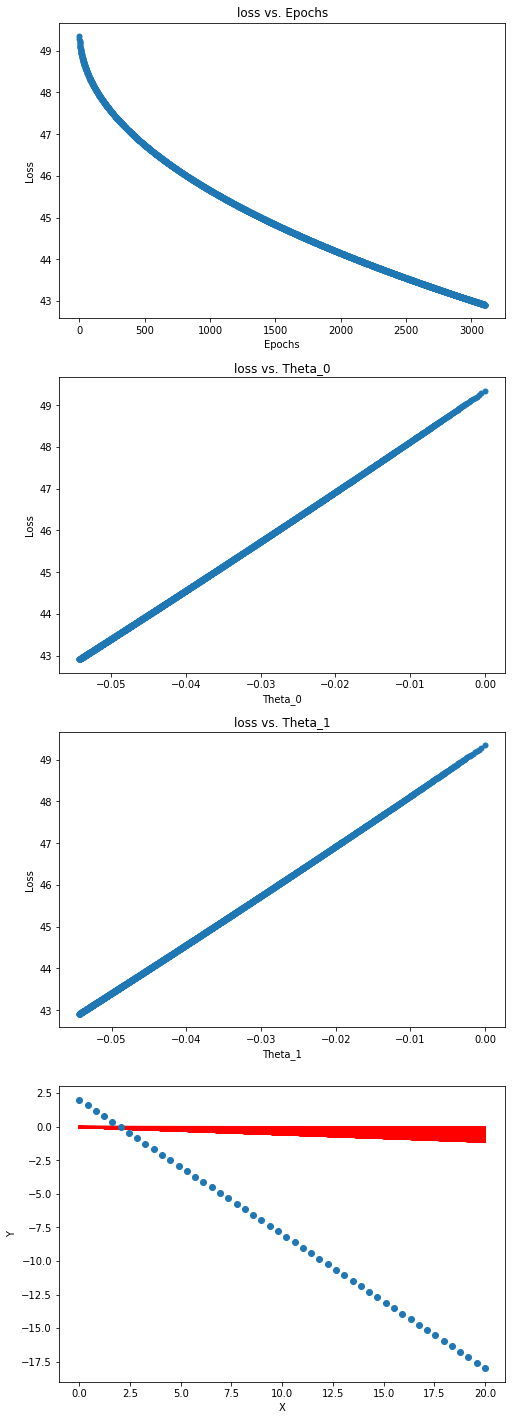

In [ ]:
theta_0, theta_1, theta_0_list, theta_1_list, loss = adaGR(X,y,alpha=0.0005,Eps=1e-08,max_iter=5000)
plots(loss,theta_0_list,theta_1_list,theta_0, theta_1,X,y,-1)

## RMSProp

### Update the previous implementation to be RMSProp.
#### Compare your results with Adagrad results.

In [ ]:
def RMS(X,y,alpha,beta,Eps,max_iter):

    m = len(X)
    theta_0=0
    theta_1=0
    v0=0
    v1=0
    theta_0_list = []
    theta_1_list = []
    loss = []

    for i in range(max_iter):
        theta_0_list.append(theta_0)
        theta_1_list.append(theta_1)
        
        h_x = theta_0 + theta_1*X
        e = (h_x - y)
        J= (1/(2*m))*e@e
        loss.append(J)

        grad_theta_0 = (e.sum())/m
        grad_theta_1 = (X@e)/m

        grad_vec = np.array([grad_theta_0,grad_theta_1])
        grad_vec_norm = np.linalg.norm(grad_vec)

        if (i > 0) and (abs(loss[-1] - loss[-2]) < 0.001 or grad_vec_norm < 0.001):            
            break
        
        v0 = beta*(v0) + (1-beta)*(grad_theta_0)**2
        v1 = beta*(v1) + (1-beta)*(grad_theta_1)**2
        theta_0 = theta_0 - (alpha/(math.sqrt(v0)+Eps)) *grad_theta_0
        theta_1 = theta_1 - (alpha/(math.sqrt(v1)+Eps)) *grad_theta_1

    print("********************* Training Report *************************\n")
    print(f'Gradient Descent converged after {i+1} iterations\n')
    print('cost=',J,'\n')
    print('Gradient Vector',grad_vec,'\n')
    print('Gradient Vector Norm:',grad_vec_norm,'\n')
    print(f'optimal theta_0: {theta_0}\noptimal theta_1: {theta_1}')
    return theta_0, theta_1, theta_0_list, theta_1_list, loss


##### The following results uses alpha = 0.05, beta = 0.9, epsilon =  1e-08, and max. iterations = 500.

In [ ]:
theta_0, theta_1, theta_0_list, theta_1_list, loss = RMS(X,y,alpha=0.05,beta=0.9,Eps=1e-08,max_iter=500)

********************* Training Report *************************

Gradient Descent converged after 103 iterations

cost= 0.01109840579144411 

Gradient Vector [-0.05015301  0.3248034 ] 

Gradient Vector Norm: 0.3286526609818766 

optimal theta_0: 1.711668500271812
optimal theta_1: -0.9761821513132517


r2_score =  0.9993602095484933


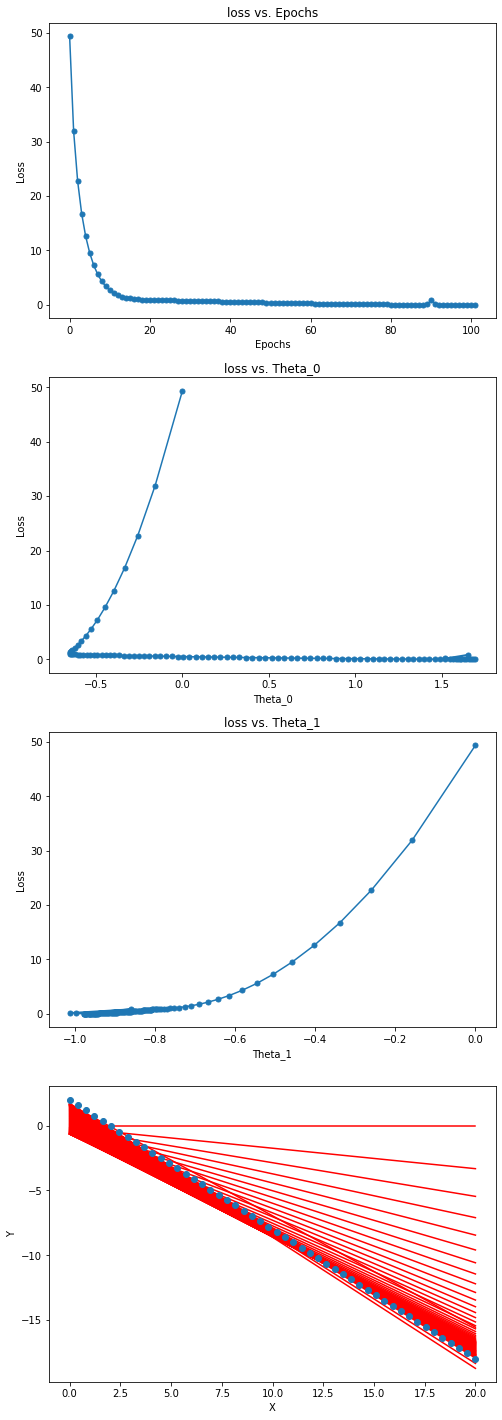

In [ ]:
plots(loss,theta_0_list,theta_1_list,theta_0, theta_1,X,y,-1)

##### The following results uses alpha = 0.005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

********************* Training Report *************************

Gradient Descent converged after 540 iterations

cost= 0.08928971151651491 

Gradient Vector [-0.18688672  0.36359152] 

Gradient Vector Norm: 0.40880978573204924 

optimal theta_0: 1.1696398899406466
optimal theta_1: -0.9356526608266086
r2_score =  0.9948527107478715


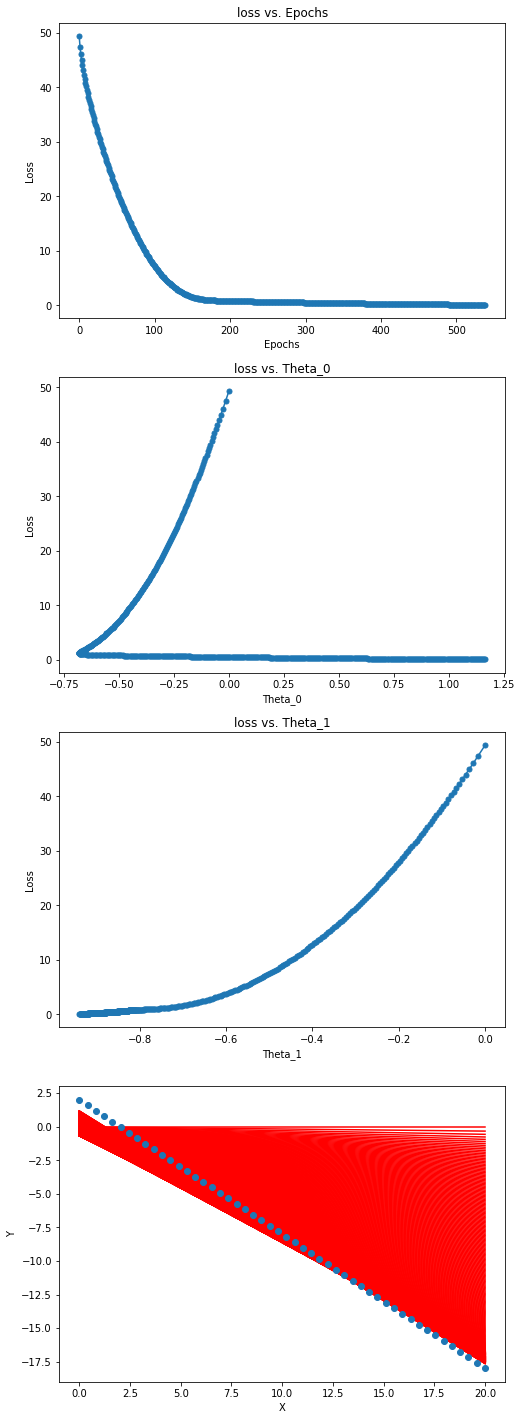

In [ ]:
theta_0, theta_1, theta_0_list, theta_1_list, loss = RMS(X,y,alpha=0.005,beta=0.9,Eps=1e-08,max_iter=5000)
plots(loss,theta_0_list,theta_1_list,theta_0, theta_1,X,y,-1)

##### The following results uses alpha = 0.0005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

********************* Training Report *************************

Gradient Descent converged after 1610 iterations

cost= 0.9086589414595332 

Gradient Vector [-0.54779936  1.77726121] 

Gradient Vector Norm: 1.8597692137657413 

optimal theta_0: -0.6390198509170808
optimal theta_1: -0.7908779506023003
r2_score =  0.9476184845511563


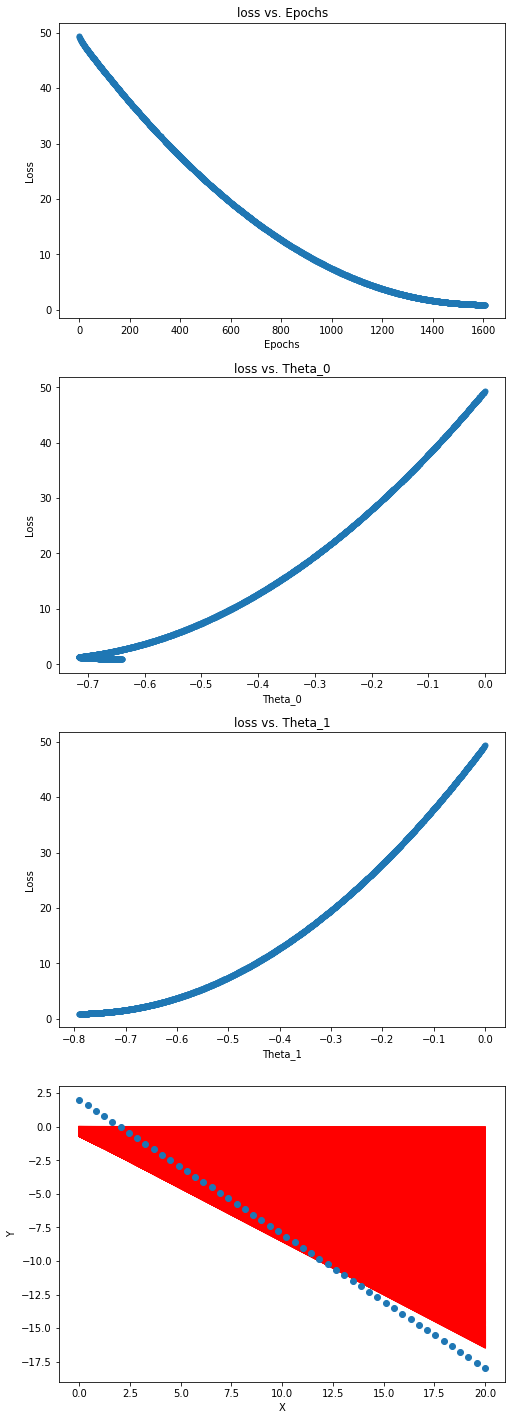

In [ ]:
theta_0, theta_1, theta_0_list, theta_1_list, loss = RMS(X,y,alpha=0.0005,beta=0.9,Eps=1e-08,max_iter=5000)
plots(loss,theta_0_list,theta_1_list,theta_0, theta_1,X,y,-1)

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

In [ ]:
def Adam(X,y,alpha,beta1,beta2,Eps,max_iter):

    m = len(X)
    theta_0=0
    theta_1=0
    m0=0
    m1=0
    v0=0
    v1=0
    theta_0_list = []
    theta_1_list = []
    loss = []

    for i in range(max_iter):
        theta_0_list.append(theta_0)
        theta_1_list.append(theta_1)
        
        h_x = theta_0 + theta_1*X
        e = (h_x - y)
        J= (1/(2*m))*e@e
        loss.append(J)

        grad_theta_0 = (e.sum())/m
        grad_theta_1 = (X@e)/m

        grad_vec = np.array([grad_theta_0,grad_theta_1])
        grad_vec_norm = np.linalg.norm(grad_vec)

        if (i > 0) and (abs(loss[-1] - loss[-2]) < 0.001 or grad_vec_norm < 0.001):            
            break
        m0 = beta1*(m0) + (1-beta1)*(grad_theta_0)
        m1 = beta1*(m1) + (1-beta1)*(grad_theta_1)
        v0 = beta2*(v0) + (1-beta2)*(grad_theta_0)**2
        v1 = beta2*(v1) + (1-beta2)*(grad_theta_1)**2
        
        # Compute bias-corrected first and second moment estimates
        m0_bias = m0/(1-beta1**(i+1))
        m1_bias = m1/(1-beta1**(i+1))
        v0_bias = v0/(1-beta2**(i+1))
        v1_bias = v1/(1-beta2**(i+1))
        
        theta_0 = theta_0 - (alpha*(m0_bias)/(math.sqrt(v0_bias)+Eps))
        theta_1 = theta_1 - (alpha*(m1_bias)/(math.sqrt(v1_bias)+Eps))
         

    print("********************* Training Report *************************\n")
    print(f'Gradient Descent converged after {i+1} iterations\n')
    print('cost=',J,'\n')
    print('Gradient Vector',grad_vec,'\n')
    print('Gradient Vector Norm:',grad_vec_norm,'\n')
    print(f'optimal theta_0: {theta_0}\noptimal theta_1: {theta_1}')
    return theta_0, theta_1, theta_0_list, theta_1_list, loss


##### The following results uses alpha = 0.05, beta1 = 0.2, beta2 = 0.7, epsilon =  1e-08, and max. iterations = 500.

In [ ]:
theta_0, theta_1, theta_0_list, theta_1_list, loss = Adam(X,y,alpha=0.05,beta1=0.2,beta2=0.7,Eps=1e-08,max_iter=500)

********************* Training Report *************************

Gradient Descent converged after 83 iterations

cost= 0.01791033575131643 

Gradient Vector [0.00204002 1.13512601] 

Gradient Vector Norm: 1.1351278411403416 

optimal theta_0: 1.6807367025487105
optimal theta_1: -0.9678696681601039


r2_score =  0.9989675218213947


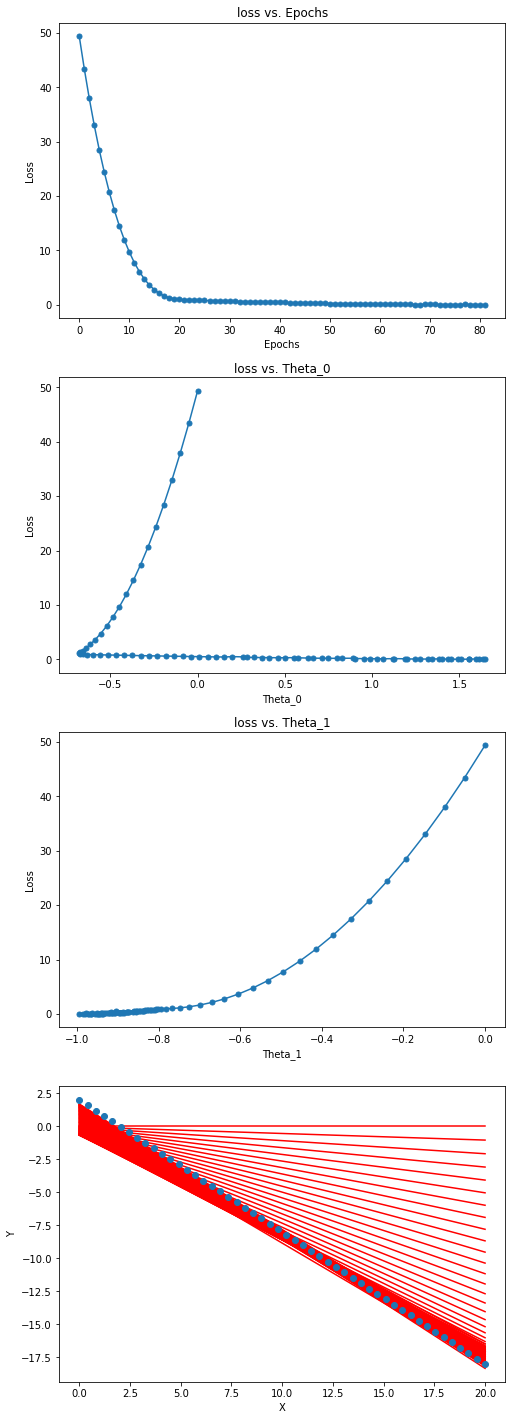

In [ ]:
plots(loss,theta_0_list,theta_1_list,theta_0, theta_1,X,y,-1)

##### The following results uses alpha = 0.005, beta1 = 0.5, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 500.

********************* Training Report *************************

Gradient Descent converged after 500 iterations

cost= 0.12784043448000953 

Gradient Vector [-0.2609825  -0.05884561] 

Gradient Vector Norm: 0.26753443167548924 

optimal theta_0: 1.0086833963112904
optimal theta_1: -0.9255815411966528


r2_score =  0.9927015180334938


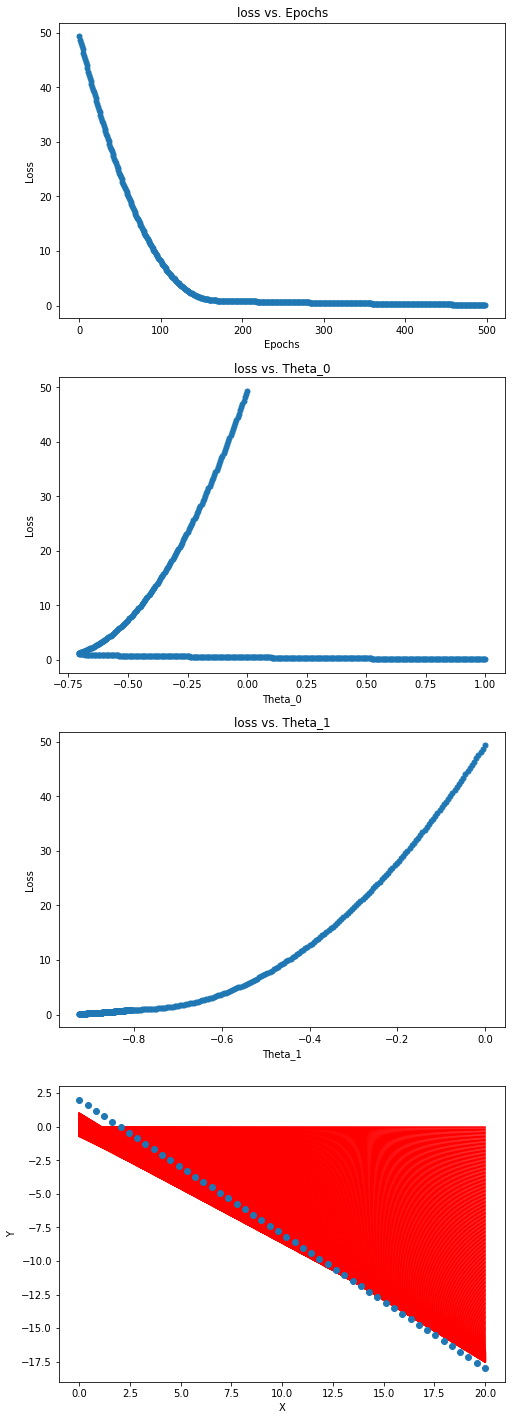

In [ ]:
theta_0, theta_1, theta_0_list, theta_1_list, loss = Adam(X,y,alpha=0.005,beta1=0.5,beta2=0.8,Eps=1e-08,max_iter=500)
print('\n')
plots(loss,theta_0_list,theta_1_list,theta_0, theta_1,X,y,-1)

##### The following results uses alpha = 0.0005, beta1 = 0.8, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 5000.

********************* Training Report *************************

Gradient Descent converged after 1585 iterations

cost= 0.9231925215171501 

Gradient Vector [-0.58535754  1.36934827] 

Gradient Vector Norm: 1.4892139299041143 

optimal theta_0: -0.6672590761549851
optimal theta_1: -0.7918098466049497


r2_score =  0.9467806664066584


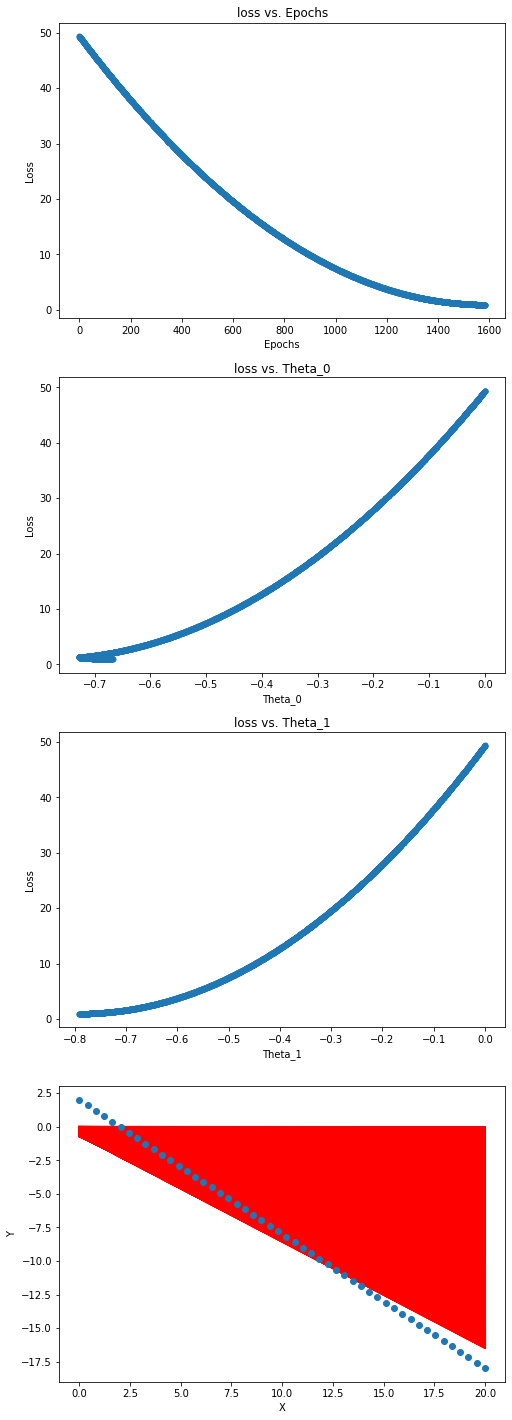

In [ ]:
theta_0, theta_1, theta_0_list, theta_1_list, loss = Adam(X,y,alpha=0.0005,beta1=0.8,beta2=0.8,Eps=1e-08,max_iter=5000)
print('\n')
plots(loss,theta_0_list,theta_1_list,theta_0, theta_1,X,y,-1)

### Play with the parameters and see the results

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

********************* Training Report *************************

Gradient Descent converged after 1064 iterations

cost= 0.892208912677249 

Gradient Vector [-0.50273401  2.26236436] 

Gradient Vector Norm: 2.3175491352575737 

optimal theta_0: -0.6038841252843627
optimal theta_1: -0.7898849886143811


r2_score =  0.9485667803280174


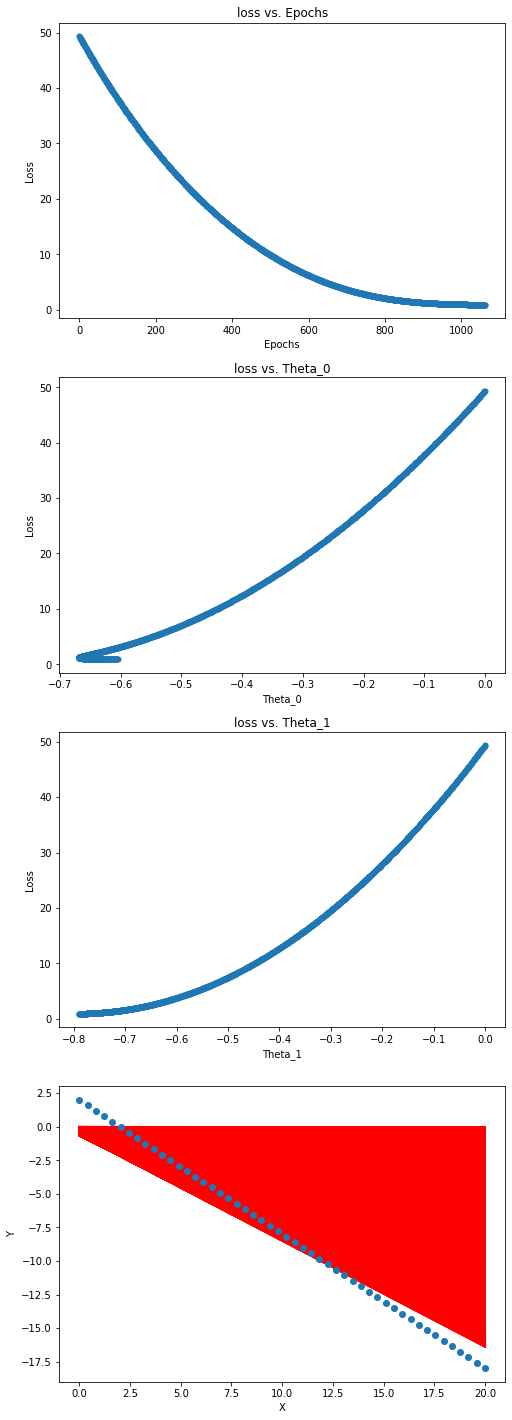

In [ ]:
theta_0, theta_1, theta_0_list, theta_1_list, loss = Adam(X,y,alpha=0.001,beta1=0.9,beta2=0.99,Eps=1e-08,max_iter=5000)
print('\n')
plots(loss,theta_0_list,theta_1_list,theta_0, theta_1,X,y,-1)

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

********************* Training Report *************************

Gradient Descent converged after 760 iterations

cost= 0.96716332487142 

Gradient Vector [-0.74482478 -0.52998364] 

Gradient Vector Norm: 0.9141370846846102 

optimal theta_0: -0.7389126908981527
optimal theta_1: -0.8005912090366051


r2_score =  0.944245878919177


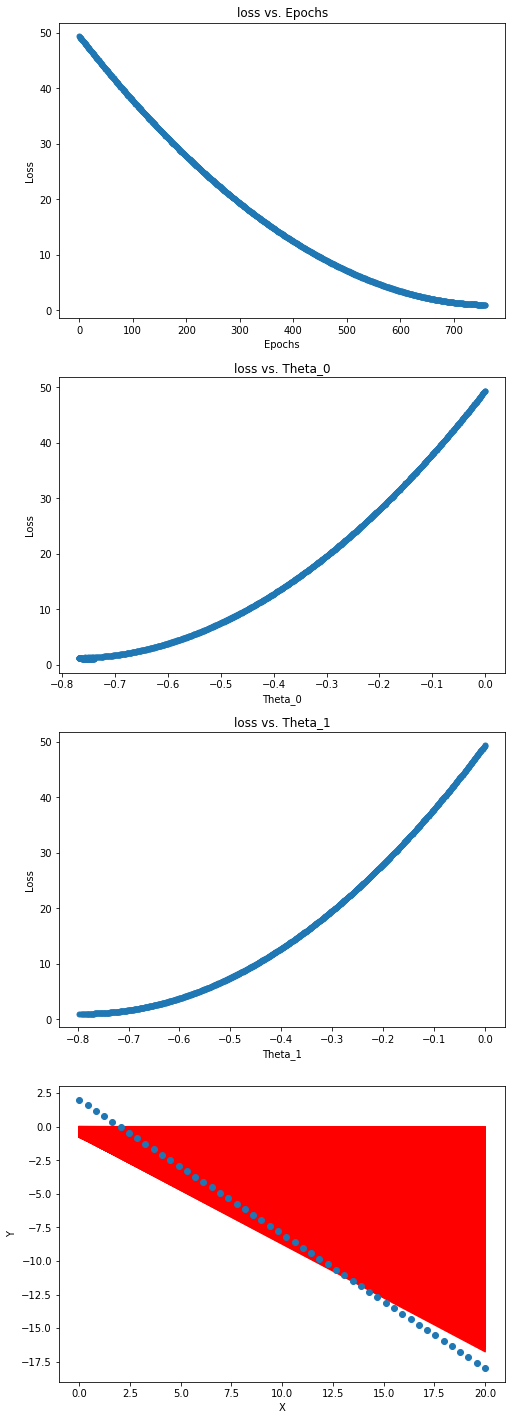

In [ ]:
theta_0, theta_1, theta_0_list, theta_1_list, loss = Adam(X,y,alpha=0.001,beta1=0.9,beta2=0.5,Eps=1e-08,max_iter=5000)
print('\n')
plots(loss,theta_0_list,theta_1_list,theta_0, theta_1,X,y,-1)

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

********************* Training Report *************************

Gradient Descent converged after 1091 iterations

cost= 0.8787138041745737 

Gradient Vector [-0.49879374  2.24672283] 

Gradient Vector Norm: 2.3014253536585167 

optimal theta_0: -0.5840781500303622
optimal theta_1: -0.791471558775119


r2_score =  0.949344733641701


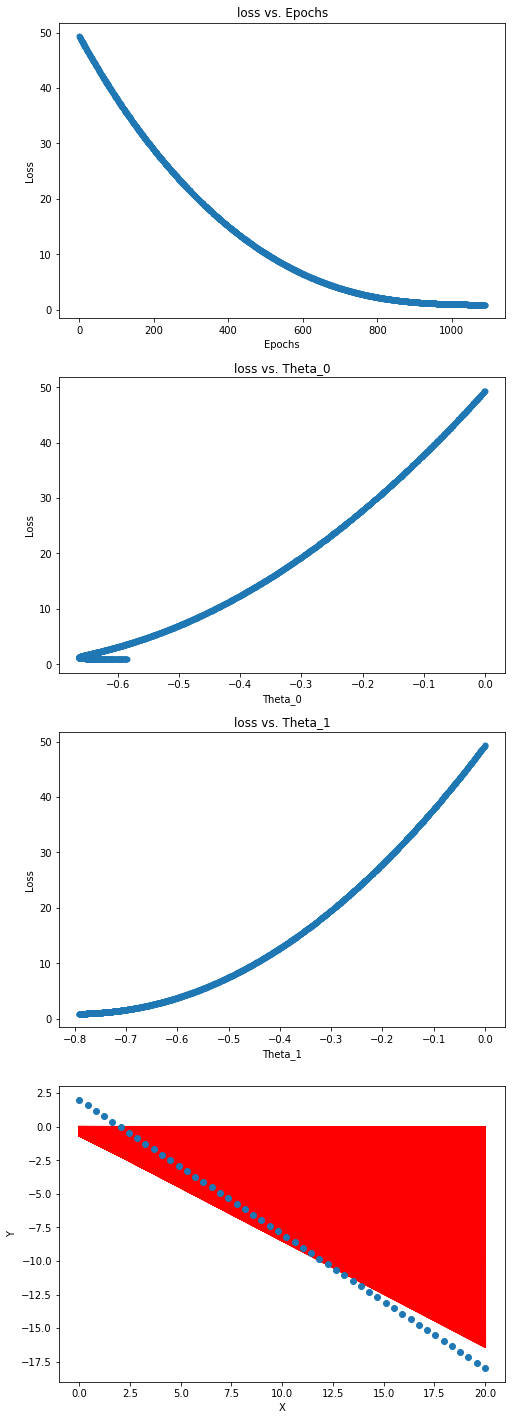

In [ ]:
theta_0, theta_1, theta_0_list, theta_1_list, loss = Adam(X,y,alpha=0.001,beta1=0.5,beta2=0.99,Eps=1e-08,max_iter=5000)
print('\n')
plots(loss,theta_0_list,theta_1_list,theta_0, theta_1,X,y,-1)

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

********************* Training Report *************************

Gradient Descent converged after 802 iterations

cost= 0.9092482939812325 

Gradient Vector [-0.66402505  0.27300861] 

Gradient Vector Norm: 0.7179574997911676 

optimal theta_0: -0.656670331911665
optimal theta_1: -0.8007354720371578


r2_score =  0.9475845101116701


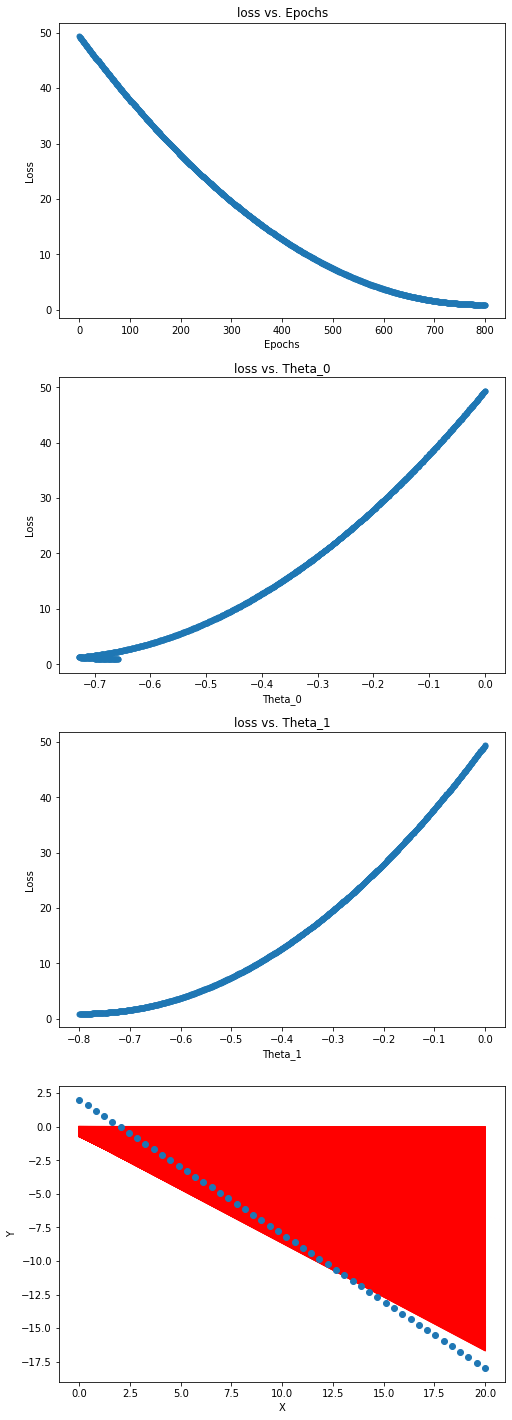

In [ ]:
theta_0, theta_1, theta_0_list, theta_1_list, loss = Adam(X,y,alpha=0.001,beta1=0.5,beta2=0.5,Eps=1e-08,max_iter=5000)
print('\n')
plots(loss,theta_0_list,theta_1_list,theta_0, theta_1,X,y,-1)

##### The following results uses alpha = 0.01, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

********************* Training Report *************************

Gradient Descent converged after 563 iterations

cost= 0.08171718788880464 

Gradient Vector [-0.19419827  0.14650081] 

Gradient Vector Norm: 0.2432600538861944 

optimal theta_0: 1.2038270885983027
optimal theta_1: -0.9398025354083269


r2_score =  0.9952892444628807


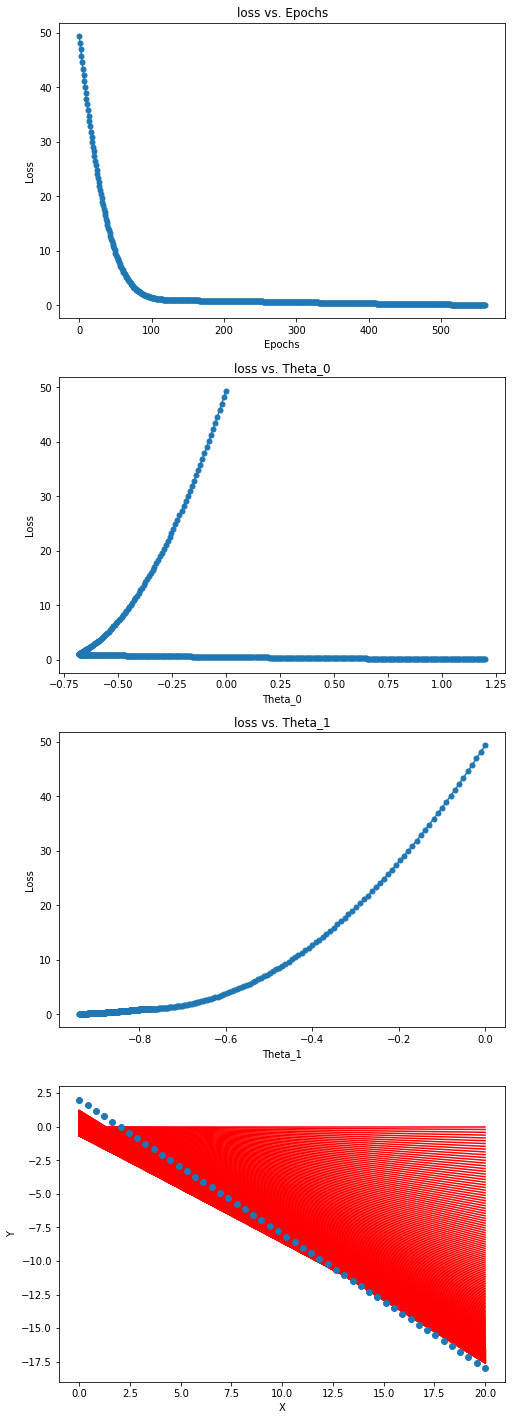

In [ ]:
theta_0, theta_1, theta_0_list, theta_1_list, loss = Adam(X,y,alpha=0.01,beta1=0.9,beta2=0.99,Eps=1e-08,max_iter=5000)
print('\n')
plots(loss,theta_0_list,theta_1_list,theta_0, theta_1,X,y,-1)